In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd

**Given Data is from 2020 - 2024 for all Electric Vehicle over whole United States**

In [2]:
vehicle_df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

### Step 1 is understanding all the data , Finding Missing Values and drawing inferences 

In [3]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [4]:
vehicle_df['Make'].unique()

array(['TESLA', 'JEEP', 'BMW', 'TOYOTA', 'NISSAN', 'CHEVROLET', 'SMART',
       'KIA', 'FORD', 'LINCOLN', 'HYUNDAI', 'AUDI', 'VOLVO', 'FIAT',
       'MAZDA', 'VOLKSWAGEN', 'RIVIAN', 'HONDA', 'MITSUBISHI', 'POLESTAR',
       'CHRYSLER', 'MINI', 'JAGUAR', 'MERCEDES-BENZ', 'SUBARU',
       'CADILLAC', 'ALFA ROMEO', 'DODGE', 'LEXUS', 'PORSCHE', 'GENESIS',
       'LUCID', 'FISKER', 'LAND ROVER', 'GMC', 'ACURA', 'BENTLEY',
       'AZURE DYNAMICS', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'ROLLS-ROYCE',
       'RAM'], dtype=object)

In [9]:
vehicle_df.shape

(200048, 17)

In [5]:
vehicle_df['Model Year'].unique()

array([2019, 2023, 2020, 2018, 2022, 2012, 2011, 2015, 2016, 2014, 2021,
       2017, 2013, 2024, 2010, 2025, 2008, 2000, 2002, 1999, 2003, 1997])

In [6]:
vehicle_df['Model Year'].unique().max()

np.int64(2025)

In [7]:
vehicle_df[vehicle_df['Model Year']==2025]
# Model Year Can be 2025

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3105,JM3KJEHA7S,Snohomish,Lake Stevens,WA,98258.0,2025,MAZDA,CX-70,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,44.0,269547729,POINT (-122.0816912 48.0122934),PUGET SOUND ENERGY INC,5.306105e+10
3150,WBY13HG00S,King,Bellevue,WA,98004.0,2025,BMW,I5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,267184340,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4041,5UX43EU02S,King,Burien,WA,98146.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,34.0,267942132,POINT (-122.3551826 47.5000521),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
6853,JTJHKCFZ9S,Clark,Vancouver,WA,98685.0,2025,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,49.0,269361074,POINT (-122.688741 45.711311),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
10432,JTJKKCFZ0S,King,Seattle,WA,98146.0,2025,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,34.0,269408968,POINT (-122.3551826 47.5000521),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195444,WBY13HG08S,Clark,Camas,WA,98607.0,2025,BMW,I5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,18.0,268003956,POINT (-122.4220033 45.6092439),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
196276,5UX43EU00S,Pierce,Tacoma,WA,98402.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,27.0,269668248,POINT (-122.4408459 47.2499623),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
196304,WB523CF09S,Whatcom,Point Roberts,WA,98281.0,2025,BMW,IX,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,268965161,POINT (-123.0602177 48.9910612),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
197298,5UX43EU04S,Pierce,Puyallup,WA,98371.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,25.0,268076980,POINT (-122.3119354 47.1990211),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305394e+10


1. Note that the make year ranges from 1997 to 2025  For Electric Vehicle Data 

In [8]:
vehicle_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

* Notice that the state of washington is common for all the vehicles 

*Analyzisng the Missing Values*

In [11]:
vehicle_df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

* Apart from Legislative District all the Null Values are not significant to be dealt with 

In [17]:
vehicle_df['Legislative District'].unique()

array([21., 15., 23., 26., 44., 36.,  2., 45., 22., 14., 47., 41.,  1.,
       10., 46., 48.,  5., 37., 33., 35., 32., 39., 38., 43., 13., 20.,
       34., 12., 40., 11., 30., 16., nan,  7.,  3.,  9., 42., 49., 18.,
       19., 17., 24., 31.,  8.,  4.,  6., 27., 25., 28., 29.])

In [21]:
vehicle_df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

1. It becomes really important to understand the importance of `CAFV` , `Electric Vehicle Type`

In [22]:
vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [24]:
vehicle_df['Electric Utility'].unique()

array(['PUGET SOUND ENERGY INC', 'PACIFICORP',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'PUD NO 1 OF CHELAN COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY', nan,
       'AVISTA CORP', 'NON WASHINGTON STATE ELECTRIC UTILITY',
       'MODERN ELECTRIC WATER COMPANY', 'PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'NO KNOWN ELECTRIC UTILITY SERVICE',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||

In [43]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [25]:
vehicle_df['Base MSRP'].unique()

array([     0,  69900,  44100,  53400,  31950,  64950,  59900,  34995,
        52900,  54950,  36800,  36900,  55700,  52650,  45600,  33950,
       110950,  81100,  39995, 184400,  32250,  91250,  43700,  98950,
        90700,  89100, 102000, 109000,  32995, 845000,  75095])

In [31]:
(vehicle_df['Base MSRP']>0).sum()

np.int64(3321)

In [32]:
vehicle_df['County'].unique()

array(['Snohomish', 'Yakima', 'Kitsap', 'King', 'Thurston', 'Island',
       'Grant', 'Skagit', 'Chelan', 'Whatcom', 'Pierce', 'Walla Walla',
       nan, 'Kittitas', 'Stevens', 'Douglas', 'Maricopa', 'Tooele',
       'Spokane', 'Whitman', 'Clark', 'Cowlitz', 'Jefferson', 'Klickitat',
       'Clallam', 'Benton', 'Pacific', 'Franklin', 'San Juan', 'Mason',
       'Lewis', 'Grays Harbor', 'Okanogan', 'San Diego', 'Skamania',
       'Lincoln', 'Adams', "St. Mary's", 'Yuba', 'Galveston', 'Saratoga',
       'Pend Oreille', 'Alexandria', "Prince George's", 'Ada',
       'James City', 'Virginia Beach', 'Santa Clara', 'Arapahoe',
       'Rockdale', 'Wahkiakum', 'Asotin', 'Cook', 'Riverside', 'Solano',
       'Suffolk', 'Chesapeake', 'St. Louis', 'Fairfax', 'Anne Arundel',
       'Harford', 'Prince William', 'Muscogee', 'San Mateo', 'DuPage',
       'Madison', 'Howard', 'Pima', 'Pinal', 'Washtenaw', 'Orange',
       'Marin', 'San Bernardino', 'Brown', 'Washoe', 'Lake', 'Churchill',
       'York'

In [39]:
vehicle_df['State'].unique()


array(['WA', 'AE', 'CO', 'AZ', 'UT', 'CA', 'MD', 'TX', 'NY', 'VA', 'ID',
       'GA', 'IL', 'MO', 'MI', 'NV', 'WI', 'AL', 'NC', 'SC', 'OR', 'NE',
       'PA', 'KY', 'DE', 'OH', 'HI', 'KS', 'FL', 'IN', 'BC', 'NM', 'IA',
       'LA', 'OK', 'DC', 'CT', 'NJ', 'WY', 'RI', 'MA', 'AR', 'AK', 'NH',
       'MN'], dtype=object)

**Note that there are total of 45 States in Datasets**
1. (-122.29943 47.912654): These are the latitude and longitude coordinates,
2. 5.306104e+10 2020 Census Tract likely refers to a specific 2020 Census Tract identified by a unique numerical code of 53,061,040,000. 

In [42]:
vehicle_df['2020 Census Tract'].unique().shape
# There are 2162 Unique Values Corresponding to the UNIQUE ID'S of 2020 census Tract 

(2162,)

In [53]:
# Creating Separate Data Set For Tesla 
tesla_df=pd.DataFrame(vehicle_df[vehicle_df['Make']=='TESLA'])

In [56]:
tesla_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJYGDEF8L,King,Seattle,WA,98107.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,36.0,112984833,POINT (-122.3788863 47.6702397),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
13,5YJ3E1EA3K,King,Auburn,WA,98092.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,47.0,180476327,POINT (-122.1550193 47.2884536),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
19,5YJ3E1EA4K,Snohomish,Everett,WA,98204.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,21.0,478330212,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
20,7SAYGAEE2P,King,Seattle,WA,98115.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,257782626,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


<BarContainer object of 88083 artists>

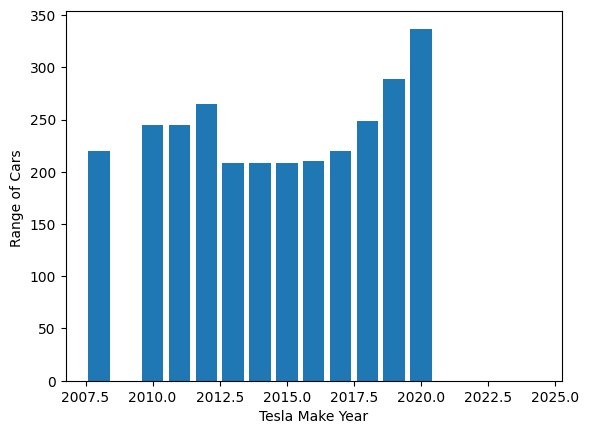

In [62]:
plt.xlabel('Tesla Make Year')
plt.ylabel('Range of Cars ')
plt.bar(tesla_df['Model Year'],tesla_df['Electric Range']);

### As far as WKT format is concerned it can be Converted to GeoDataframe to be analysed easily 

In [78]:
tesla_df['Vehicle Location']

0            POINT (-122.29943 47.912654)
5         POINT (-122.3788863 47.6702397)
13        POINT (-122.1550193 47.2884536)
19        POINT (-122.2507211 47.8976713)
20        POINT (-122.3008235 47.6862671)
                       ...               
200033    POINT (-122.1207376 47.6705374)
200036      POINT (-122.338942 47.821454)
200038      POINT (-122.144149 47.560742)
200041    POINT (-122.0816912 48.0122934)
200047       POINT (-122.636245 47.62806)
Name: Vehicle Location, Length: 88083, dtype: object

In [86]:
# Create a GeoDataFrame from the WKT strings
tesla_df['geometry'] = gpd.GeoSeries.from_wkt(tesla_df['Vehicle Location'])
gdf = gpd.GeoDataFrame( geometry='geometry')

TypeError: Expected bytes or string, got float

In [90]:
tesla_df['Vehicle Location'].isna().sum()
# Note that the two values are Null Values 

np.int64(2)

In [91]:
for location in tesla_df['Vehicle Location']:
 if (tesla_df.at[location,'Vehicle Location'].ina()):
  tesla_df.at[location,'Vehicle Location'] =''
  

KeyError: 'POINT (-122.29943 47.912654)'